# Import Libraries

In [45]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for core plotting and visualization
import matplotlib.pyplot as plt

# Import seaborn for advanced statistical visualizations
import seaborn as sns

# Import StandardScaler for feature scaling (mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

# Import PCA for linear dimensionality reduction and variance analysis
from sklearn.decomposition import PCA

# Load Data

In [26]:
# Load the dataset
df = pd.read_csv('/content/Wholesale customers data.csv')

## Data Inspecting

In [27]:
# Display the first 5 rows of the dataset to get a quick preview of the data
print("DataFrame head:")
print(df.head())

# Display concise summary of the DataFrame:
print("\nDataFrame info:")
df.info()

# Display descriptive statistics for all numerical columns:
print("\nDataFrame descriptive statistics:")
print(df.describe())

DataFrame head:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 no

## Exploratory Data Analysis (EDA)

In [2]:
# Define the list of annual spending features for easy iteration
spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

Libraries imported and spending features list defined.


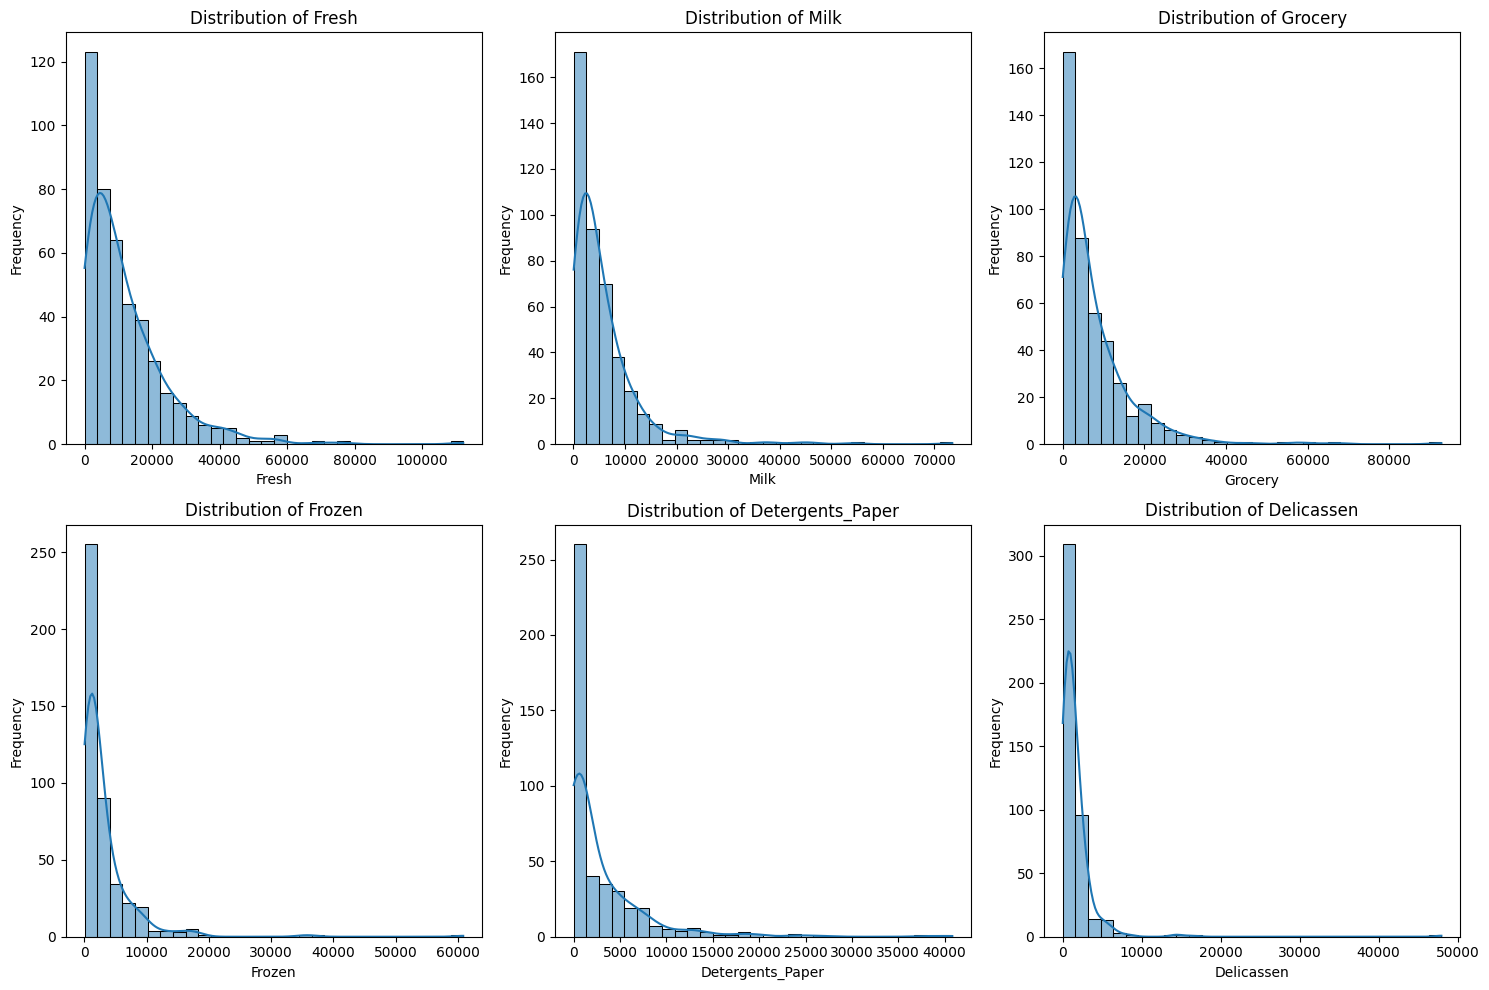

Histograms for spending features have been generated.


In [29]:
# Create a large figure to hold multiple subplots
plt.figure(figsize=(15, 10))

# Loop through each spending feature and create a histogram
for i, feature in enumerate(spending_features):

    # Create each subplot in a 2x3 grid (since there are 6 features)
    plt.subplot(2, 3, i + 1)

    # Plot histogram with KDE (density curve) to visualize distribution
    sns.histplot(df[feature], kde=True, bins=30)

    # Set plot title and axis labels
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping of plots
plt.tight_layout()

# Display all histograms
plt.show()

# Confirmation message after generating all histograms
print("Histograms for spending features have been generated.")

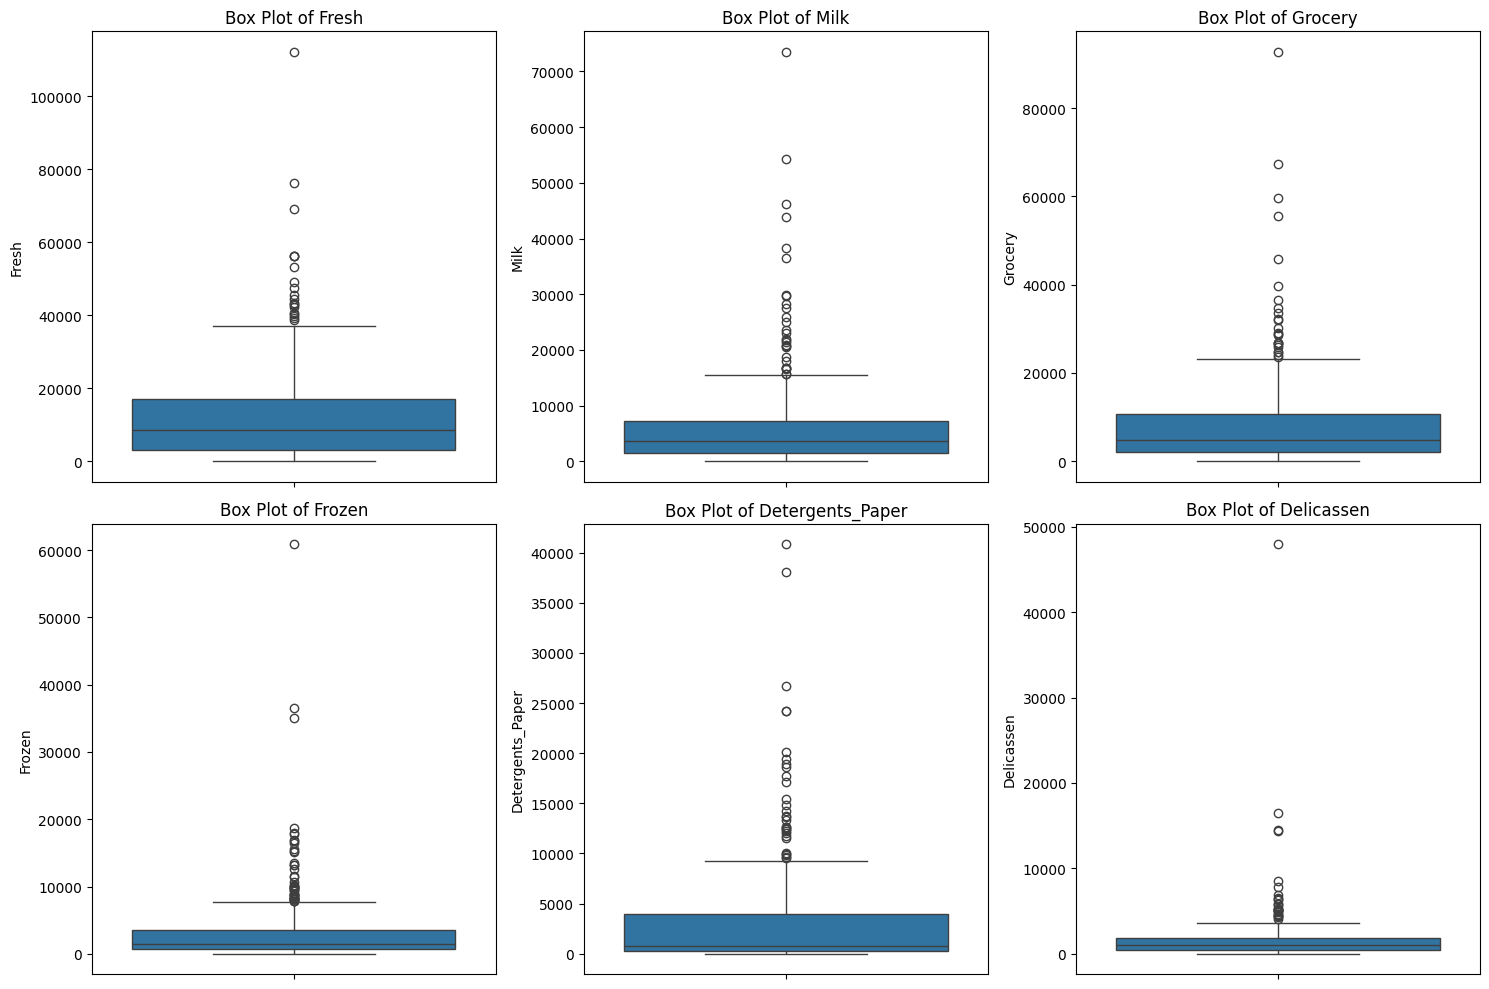

Box plots for spending features have been generated.


In [30]:
# Create a large figure to hold multiple box plots
plt.figure(figsize=(15, 10))

# Loop through each spending feature to generate a box plot
for i, feature in enumerate(spending_features):

    # Create each subplot in a 2x3 grid
    plt.subplot(2, 3, i + 1)

    # Draw box plot to visualize distribution, spread, and outliers
    sns.boxplot(y=df[feature])

    # Set plot title and y-axis label
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

# Adjust layout to avoid overlapping plots
plt.tight_layout()

# Display all box plots
plt.show()

# Confirmation message after generating the box plots
print("Box plots for spending features have been generated.")

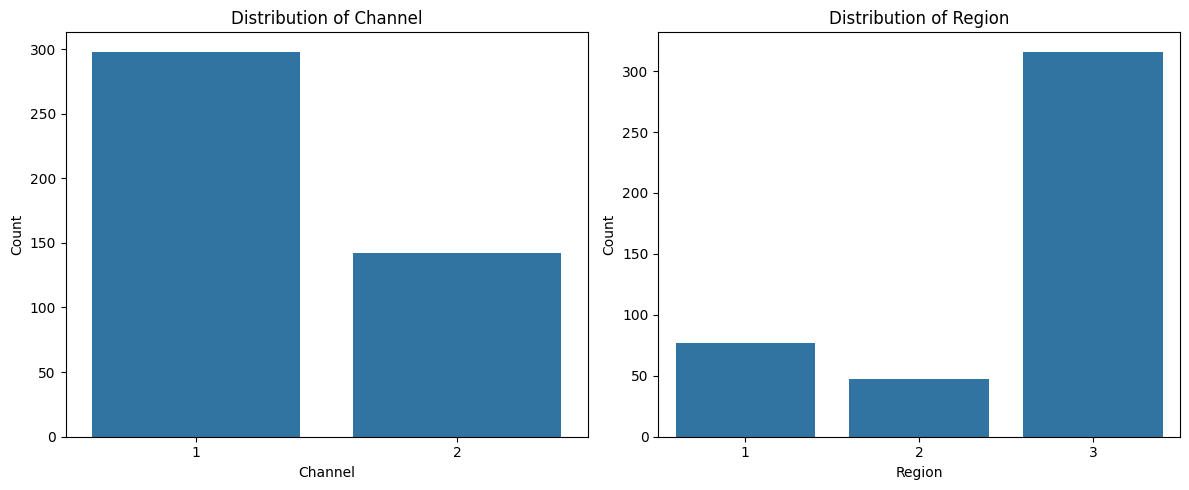

Count plots for 'Channel' and 'Region' have been generated.


In [31]:
# Create a figure to hold both count plots
plt.figure(figsize=(12, 5))

# Count plot for 'Channel'
plt.subplot(1, 2, 1)

# Visualize the distribution of customer channels (e.g., Horeca vs Retail)
sns.countplot(x=df['Channel'])

# Set plot title and axis labels
plt.title('Distribution of Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

# Count plot for 'Region'
plt.subplot(1, 2, 2)

# Visualize the distribution of customers across different regions
sns.countplot(x=df['Region'])

# Set plot title and axis labels
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Display both plots
plt.show()

# Confirmation message after generating the plots
print("Count plots for 'Channel' and 'Region' have been generated.")


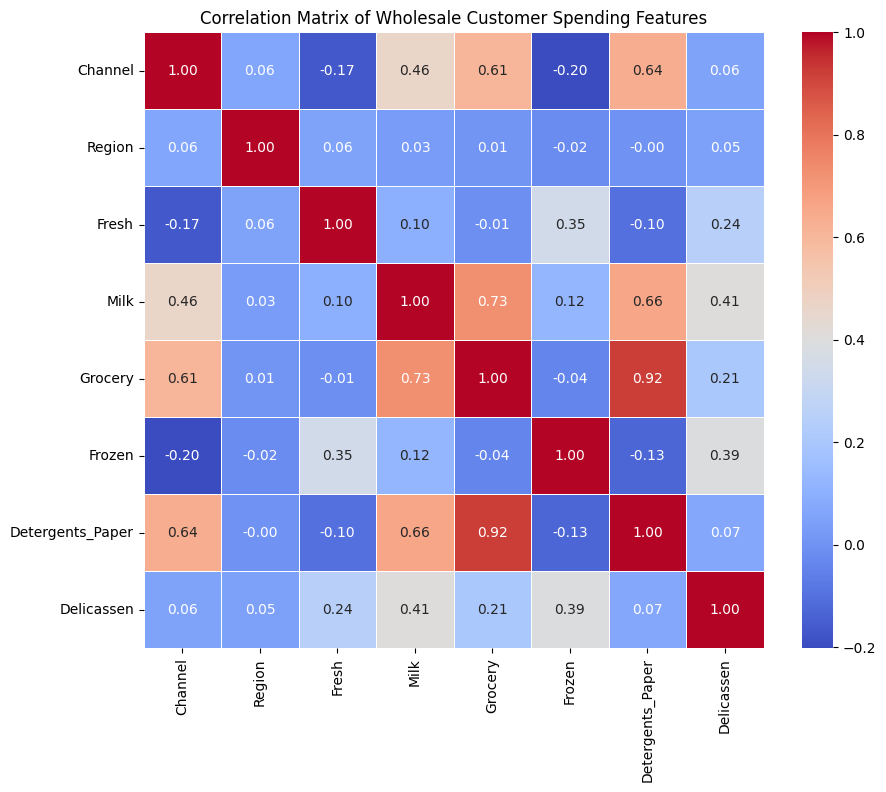

Correlation matrix and heatmap have been generated.


In [32]:
# Compute the correlation matrix for all numerical features only
correlation_matrix = df.corr(numeric_only=True)

# Create a figure for the heatmap visualization
plt.figure(figsize=(10, 8))

# Plot the correlation heatmap:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Add a clear title for context
plt.title('Correlation Matrix of Wholesale Customer Spending Features')

# Display the heatmap
plt.show()

# Confirmation message after generating the heatmap
print("Correlation matrix and heatmap have been generated.")


### Feature Relevance and Interpretation in Wholesale Business Operations

This dataset provides a detailed view into the purchasing behavior of wholesale customers, categorized by various product types, and segmented by distribution channel and geographical region. Understanding these features is crucial for strategic decision-making in the wholesale retail sector.

*   **Channel**: This categorical feature distinguishes between different distribution channels, typically Horeca (Hotel/Restaurant/Cafe) and Retail. The count plots revealed the distribution of customers across these channels. Identifying the dominant channel(s) helps in tailoring marketing strategies, optimizing inventory for specific business types, and understanding the distinct needs of each channel. For example, Horeca customers might purchase more Fresh products, while Retail customers might focus more on Grocery items.

*   **Region**: This categorical feature indicates the geographical region of the customer. The count plots showed how customers are distributed across different regions. Regional analysis is vital for localized marketing campaigns, supply chain logistics, and understanding regional consumption patterns. Differences in spending across regions can inform where to expand operations or allocate resources more effectively.

*   **Fresh**: Annual spending on fresh products (e.g., fruits, vegetables, meat). Histograms and box plots for 'Fresh' showed a wide range of spending with a right-skewed distribution, indicating that most customers spend moderately on fresh goods, but a few customers are very high spenders. This category is critical for businesses supplying restaurants, hotels, and grocery stores. High spending in 'Fresh' could indicate a focus on quality and perishable goods, requiring efficient supply chain management.

*   **Milk**: Annual spending on milk products. Similar to 'Fresh', 'Milk' also exhibits a right-skewed distribution with a wide range of spending. Milk is a staple in both Horeca and retail sectors. High correlation with 'Grocery' and 'Detergents_Paper' (as observed in the heatmap) suggests that customers buying large quantities of milk often also buy a lot of general groceries and household cleaning items, indicating they might be larger retail establishments or institutions.

*   **Grocery**: Annual spending on general grocery items. 'Grocery' spending is highly skewed and shows a strong positive correlation with 'Milk' and 'Detergents_Paper'. This is expected as these items often go hand-in-hand. This category is a major indicator of a customer's overall size and purchasing volume, especially for retailers. Identifying high-grocery spenders helps in understanding core customer segments.

*   **Frozen**: Annual spending on frozen products. 'Frozen' spending also has a right-skewed distribution. The moderate correlation with 'Fresh' and 'Milk' suggests that customers buying frozen goods might also purchase other food categories but perhaps not as intensely as those focused solely on fresh items. This category is important for long-shelf-life products and caters to different storage capabilities and usage patterns.

*   **Detergents_Paper**: Annual spending on detergents and paper products. This category is highly correlated with 'Grocery' and 'Milk', which makes sense as these are household and commercial essentials. High spending here, particularly in conjunction with 'Grocery', often points to larger retail outlets or institutional clients (like hotels or restaurants) that require significant volumes of non-food consumables.

*   **Delicassen**: Annual spending on delicatessen products. 'Delicassen' spending is typically lower than other categories and highly skewed, indicating it's a specialized product category. It might be less essential for all businesses but important for specific niches (e.g., gourmet shops, high-end restaurants). Its correlation with other categories can reveal customer segments that value premium or specialty food items.

## Data Preprocessing and Scaling

### Missing Values Check

Based on the `df.info()` output from the initial data inspection, there are no missing values across any of the columns in the dataset. Therefore, no explicit handling of missing values is required for this subtask.

In [34]:
# Identify the numerical features that represent spending
spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Initialize a StandardScaler object
scaler = StandardScaler()

# Apply the StandardScaler to the spending_features columns
df[spending_features] = scaler.fit_transform(df[spending_features])

print("Spending features have been scaled using StandardScaler.")
print("DataFrame head after scaling:")
print(df.head())

Spending features have been scaled using StandardScaler.
DataFrame head after scaling:
   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.052933  0.523568 -0.041115 -0.589367         -0.043569   
1        2       3 -0.391302  0.544458  0.170318 -0.270136          0.086407   
2        2       3 -0.447029  0.408538 -0.028157 -0.137536          0.133232   
3        1       3  0.100111 -0.624020 -0.392977  0.687144         -0.498588   
4        2       3  0.840239 -0.052396 -0.079356  0.173859         -0.231918   

   Delicassen  
0   -0.066339  
1    0.089151  
2    2.243293  
3    0.093411  
4    1.299347  


### Importance of Data Scaling for Dimensionality Reduction

Data scaling is a crucial preprocessing step before applying dimensionality reduction techniques like Principal Component Analysis (PCA) and Uniform Manifold Approximation and Projection (UMAP). Its importance stems from the underlying mathematical principles of these algorithms:

1.  **Preventing Domination by Large-Ranged Features**: Without scaling, features with larger numerical ranges or higher variances would inherently have a greater influence on the distance calculations and variance explained by principal components in PCA, or the neighbor graph construction in UMAP. For example, a feature like 'Fresh' with values ranging up to 100,000 might overshadow 'Delicassen' with values up to 50,000, simply due to its scale, even if 'Delicassen' spending patterns are more indicative of customer segments.

2.  **PCA**: PCA works by identifying directions (principal components) that maximize variance in the data. If features are not scaled, features with larger magnitudes contribute disproportionately to the total variance, leading PCA to prioritize components that primarily reflect the variance of these features, rather than the true underlying patterns across all features. Scaling ensures that each feature contributes equally to the calculation of principal components, based on its actual variation relative to its own mean, not its absolute magnitude.

3.  **UMAP**: UMAP is a manifold learning technique that aims to find a low-dimensional representation of the data that preserves the topological structure of the high-dimensional data. It relies on distance metrics (e.g., Euclidean distance) to build a neighborhood graph. If features are not scaled, distances will be heavily influenced by features with larger ranges, potentially distorting the true proximity relationships between data points and leading to a suboptimal low-dimensional embedding. Scaling ensures that the distance calculations are fair and reflect the relative differences across all features.

By applying `StandardScaler`, we transform the data such that each feature has a mean of 0 and a standard deviation of 1. This standardization ensures that all features are on a comparable scale, allowing PCA and UMAP to identify meaningful structures and patterns in the data without being biased by arbitrary differences in feature magnitudes.

## Principal Component Analysis (PCA)

In [37]:
# Initialize the PCA model without specifying the number of components
pca = PCA()

# Fit the PCA model on the scaled spending features only
pca.fit(df[spending_features])

# Confirmation message after successfully fitting the PCA model
print("PCA model fitted to scaled spending features.")

PCA model fitted to scaled spending features.


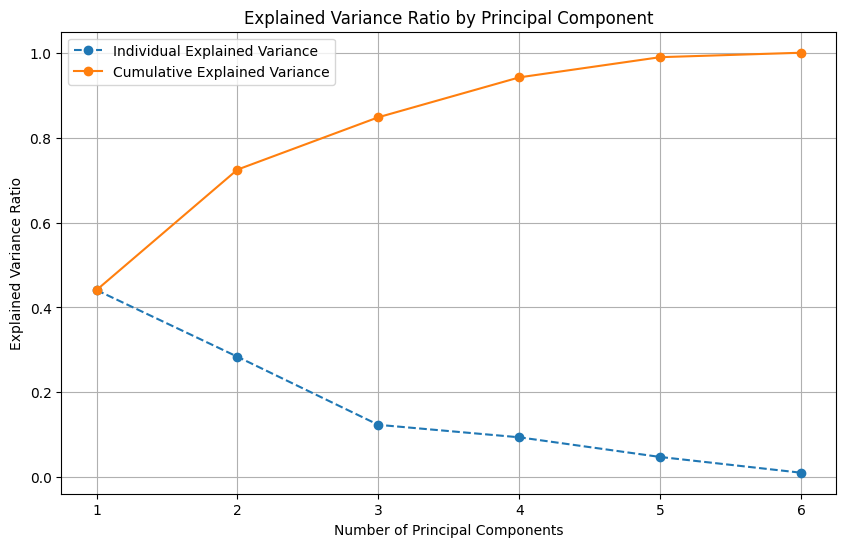

Explained variance ratios and cumulative explained variance plot generated.


In [38]:
# Extract the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Compute the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Create a figure for the explained variance plots
plt.figure(figsize=(10, 6))

# Plot the individual explained variance for each principal component (Scree Plot)
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    linestyle='--',
    label='Individual Explained Variance'
)

# Plot the cumulative explained variance to show total variance preservation
plt.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker='o',
    linestyle='-',
    label='Cumulative Explained Variance'
)

# Add title and axis labels for clarity
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')

# Ensure all component indices appear on the x-axis
plt.xticks(range(1, len(explained_variance_ratio) + 1))

# Add grid and legend for better readability
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

# Confirmation message after generating the plots
print("Explained variance ratios and cumulative explained variance plot generated.")

In [39]:
# Apply PCA transformation to the scaled spending features
pca_components = pca.fit_transform(df[spending_features])

# Convert the PCA output into a DataFrame for easier analysis and visualization
pca_df = pd.DataFrame(
    data=pca_components,
    columns=[f'Principal Component {i+1}' for i in range(pca_components.shape[1])]
)

# Confirmation message after successful transformation
print("Scaled data transformed into principal components and stored in 'pca_df'.")

# Display the first 5 rows of the PCA-transformed DataFrame
print("First 5 rows of PCA DataFrame:")
print(pca_df.head())

Scaled data transformed into principal components and stored in 'pca_df'.
First 5 rows of PCA DataFrame:
   Principal Component 1  Principal Component 2  Principal Component 3  \
0               0.193291              -0.305100               0.140878   
1               0.434420              -0.328413              -0.319007   
2               0.811143               0.815096              -1.523416   
3              -0.778648               0.652754              -0.163012   
4               0.166287               1.271434              -0.066279   

   Principal Component 4  Principal Component 5  Principal Component 6  
0              -0.486432               0.495281              -0.007414  
1              -0.178830               0.365579               0.054572  
2              -1.254082              -0.379054              -0.277539  
3               0.380060              -0.276138               0.060718  
4              -0.826227              -0.394211              -0.026825  


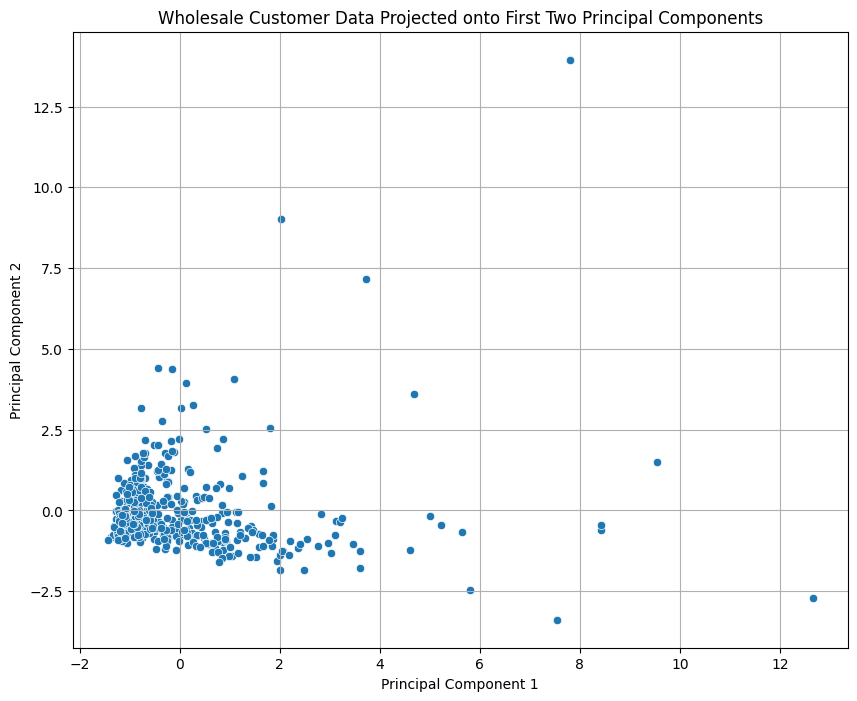

Scatter plot of the first two principal components generated.


In [40]:
# Create a figure for the PCA 2D scatter plot
plt.figure(figsize=(10, 8))

# Plot the data projected onto the first two principal components
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    data=pca_df
)

# Add a descriptive title and axis labels
plt.title('Wholesale Customer Data Projected onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add grid lines for better visual readability
plt.grid(True)

# Display the scatter plot
plt.show()

# Confirmation message after generating the PCA 2D visualization
print("Scatter plot of the first two principal components generated.")

In [41]:
# Create a DataFrame containing the PCA component loadings
component_loadings = pd.DataFrame(
    pca.components_,
    columns=spending_features,
    index=[f'Principal Component {i+1}' for i in range(pca.n_components_)]
)

# Display a message indicating that the component loadings were created successfully
print("Component Loadings DataFrame:")

# Display the first two principal components and their feature contributions
print(component_loadings.head(2))

Component Loadings DataFrame:
                          Fresh      Milk   Grocery    Frozen  \
Principal Component 1  0.042884  0.545118  0.579256  0.051189   
Principal Component 2  0.527932  0.083168 -0.146088  0.611278   

                       Detergents_Paper  Delicassen  
Principal Component 1          0.548640    0.248682  
Principal Component 2         -0.255233    0.504207  


### Interpretation of Principal Components

Based on the component loadings, we can interpret the first two principal components (PC1 and PC2) as follows:

**Principal Component 1 (PC1)**:
*   **High positive loadings**: 'Grocery' (0.579), 'Detergents_Paper' (0.549), and 'Milk' (0.545).
*   **Interpretation**: PC1 primarily represents a spending pattern associated with high consumption of **staple goods and household essentials**. Customers scoring high on PC1 are likely large retailers or institutions (e.g., supermarkets, large hotels) that purchase significant volumes of general groceries, milk, and cleaning supplies. This component captures the general volume and frequency of purchases for everyday necessities.

**Principal Component 2 (PC2)**:
*   **High positive loadings**: 'Frozen' (0.611), 'Fresh' (0.528), and 'Delicassen' (0.504).
*   **Interpretation**: PC2 is strongly driven by spending on **perishable and specialty food items**. Customers scoring high on PC2 are likely businesses that prioritize fresh, frozen, and gourmet products. This could include restaurants, cafes, smaller specialty food stores, or catering services that focus on fresh ingredients and diverse culinary offerings. This component distinguishes customers based on their focus on food quality, variety, and perhaps a higher-end clientele.

## UMAP for Non-linear Structure Discovery

In [42]:
try:
    from umap import UMAP
    print("UMAP successfully imported.")
except ImportError:
    print("UMAP library not found. Please install it using: !pip install umap-learn")
    # Exit or raise an error if UMAP is essential for the next steps and not installed

UMAP successfully imported.


In [43]:
# Initialize the UMAP model for 2D dimensionality reduction
umap_reducer = UMAP(n_components=2, random_state=42)

# Fit the UMAP model on the scaled spending features and transform the data
umap_components = umap_reducer.fit_transform(df[spending_features])

# Convert the UMAP output into a DataFrame for easier visualization and analysis
umap_df = pd.DataFrame(
    data=umap_components,
    columns=['UMAP Component 1', 'UMAP Component 2']
)

# Confirmation message after successful UMAP transformation
print("UMAP model fitted and data transformed into 'umap_df'.")

# Display the first 5 rows of the UMAP-transformed DataFrame
print("First 5 rows of UMAP DataFrame:")
print(umap_df.head())

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP model fitted and data transformed into 'umap_df'.
First 5 rows of UMAP DataFrame:
   UMAP Component 1  UMAP Component 2
0          6.406758          8.002722
1          5.747861          8.048567
2          7.982987          7.387905
3         12.768356          7.462266
4          8.184114          6.066769


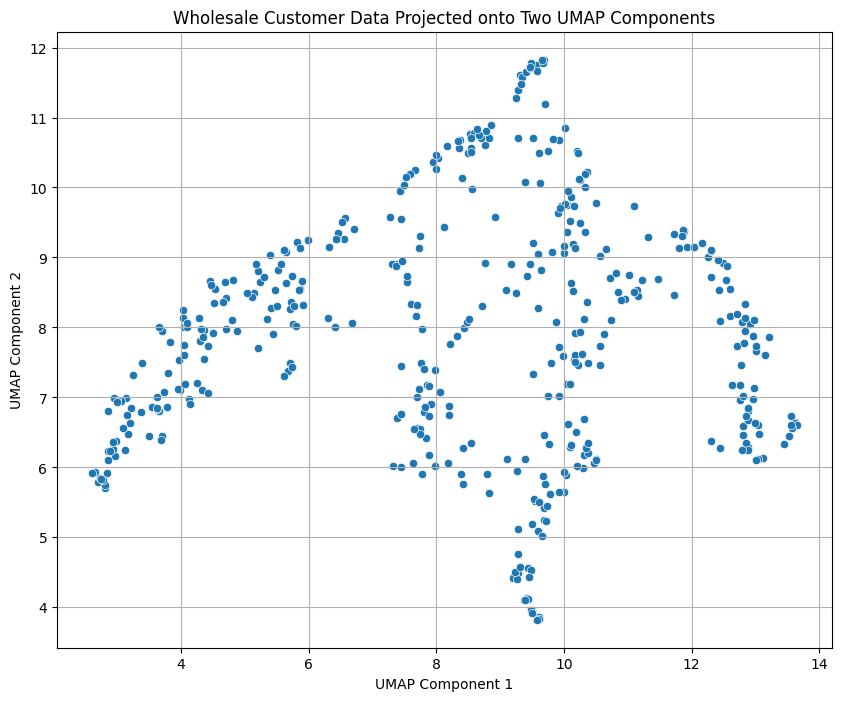

Scatter plot of the UMAP-transformed data generated.


In [44]:
# Create a figure for the UMAP 2D scatter plot
plt.figure(figsize=(10, 8))

# Plot the data projected onto the two UMAP components
sns.scatterplot(
    x='UMAP Component 1',
    y='UMAP Component 2',
    data=umap_df
)

# Add a descriptive title and axis labels
plt.title('Wholesale Customer Data Projected onto Two UMAP Components')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# Add grid lines to improve visual readability
plt.grid(True)

# Display the scatter plot
plt.show()

# Confirmation message after generating the UMAP visualization
print("Scatter plot of the UMAP-transformed data generated.")

### Comparing UMAP and PCA Visualizations

Both PCA and UMAP are dimensionality reduction techniques, but they operate on different principles, leading to potentially distinct visualizations and insights:

*   **PCA (Principal Component Analysis)**: PCA is a linear dimensionality reduction method. It aims to find orthogonal components that capture the maximum variance in the data. The PCA scatter plot often shows a more spread-out, elliptical distribution of data points. Clusters, if they exist, might appear stretched or less distinctly separated, especially if the underlying data structure is non-linear. In our PCA plot, we saw a general spread of points, with some indications of density variations, but no clearly separated, tightly-knit clusters.

*   **UMAP (Uniform Manifold Approximation and Projection)**: UMAP is a non-linear dimensionality reduction technique. Its goal is to preserve the global and local structure of the high-dimensional data in a lower-dimensional space, often revealing clusters and relationships that are not linearly separable. It does this by constructing a fuzzy simplicial complex of the data in the high-dimensional space and then optimizing a low-dimensional representation to be as structurally similar as possible.

**How UMAP might reveal different patterns:**

1.  **Preservation of Non-linear Structures**: If the customer segments are defined by complex, non-linear relationships in their spending patterns, UMAP is much better equipped to reveal these. PCA, being linear, would struggle to separate such non-linear clusters, often projecting them into overlapping regions.
2.  **Cluster Separation**: UMAP often produces more compact and well-separated clusters, even if they are intertwined in the original high-dimensional space. The visualization of UMAP-transformed data is typically characterized by distinct groupings, which can be easier to interpret as customer segments.
3.  **Local vs. Global Structure**: While PCA focuses on global variance, UMAP attempts to preserve both global and local data structures. This means that not only are the overall relationships between large groups of customers maintained, but also the fine-grained relationships between individual customers within a cluster.
4.  **Interpretability**: For this dataset, if UMAP shows tighter, more distinct clusters compared to PCA, it would suggest that the underlying customer segments are better described by non-linear combinations of spending features. These distinct clusters could represent more specific customer archetypes (e.g., small specialty stores vs. large general retailers) that are clearly differentiated in the UMAP space.

By comparing the PCA and UMAP plots, we can assess whether the structure of our customer spending data is predominantly linear or if there are significant non-linear relationships that UMAP is better able to capture, potentially leading to more insightful customer segmentation.

## Interpretation of Components and Business Insights

### Interpretation of Components and Business Insights

This section synthesizes the findings from PCA and UMAP to identify customer segments and derive actionable business insights.

#### 1. Interpretation of PCA Components and Clusters

*   **Principal Component 1 (PC1)**:
    *   **Loadings**: High positive loadings for 'Grocery', 'Detergents_Paper', and 'Milk'.
    *   **Interpretation**: PC1 represents a spending pattern associated with **staple goods and household essentials**. Customers with high positive scores on PC1 are likely large-volume buyers of everyday necessities, such. as large retailers, supermarkets, or institutions.
*   **Principal Component 2 (PC2)**:
    *   **Loadings**: High positive loadings for 'Frozen', 'Fresh', and 'Delicassen'.
    *   **Interpretation**: PC2 represents a spending pattern focused on **perishable and specialty food items**. Customers with high positive scores on PC2 likely prioritize fresh, frozen, and gourmet products, suggesting businesses like restaurants, cafes, or specialty food stores.

*   **Clusters in PCA Plot**: The PCA scatter plot reveals several potential groupings:
    *   **Group 1 (Low PC1, Moderate PC2)**: Located towards the left of the plot, this group generally has lower spending on staple goods but varying levels on perishable/specialty items. These could be smaller, specialized businesses like gourmet shops or high-end restaurants.
    *   **Group 2 (High PC1, Low PC2)**: Towards the right and bottom, these customers show high spending on staple goods but lower on fresh/specialty items. This might represent large general retailers or institutions with a focus on high-volume, standard inventory.
    *   **Group 3 (Moderate PC1, Moderate PC2)**: The large central cluster represents a mixed bag, potentially encompassing a wide range of businesses with balanced purchasing across categories.
    *   **Outliers**: Several data points appear far from the main clusters, indicating customers with exceptionally high spending in specific categories, which might represent unique business models or very large clients.

#### 2. Interpretation of UMAP Components and Clusters

UMAP aims to preserve the local structure of the data, often revealing more intricate, non-linear relationships than PCA. While UMAP components do not have direct interpretations in terms of original features like PCA loadings, the visualization allows for the identification of distinct groupings.

*   **Clusters in UMAP Plot**: The UMAP scatter plot often shows more distinct, tightly packed clusters compared to PCA, suggesting stronger natural groupings:
    *   **Several Densely Clustered Regions**: UMAP typically reveals multiple distinct clusters, indicating different customer archetypes. These groupings are likely based on more complex, non-linear combinations of spending habits that differentiate customer segments more clearly than a simple linear combination.
    *   **Disconnected 'Islands'**: The presence of separate 'islands' suggests that certain customer segments are very different from others in their overall purchasing behavior, perhaps representing entirely different business models or target markets within the wholesale sector.
    *   **Continuums and Bridges**: Some regions might show a continuum, while others might be connected by 'bridges', indicating gradual transitions or shared characteristics between certain segments.

UMAP's strength is in highlighting these intrinsic relationships, suggesting that what appears as a single large cluster in PCA might be separable into distinct sub-segments under a non-linear lens.

#### 3. Proposed Customer Segments

Combining insights from both PCA and UMAP, we can propose the following customer segments:

1.  **Staple-Focused Large Retailers/Institutions (High PC1)**: These customers prioritize large quantities of general groceries, milk, and cleaning supplies. They represent high-volume, consistent buyers of essential goods, likely large supermarkets, hotel chains, or catering services.
2.  **Perishable & Specialty Food Providers (High PC2)**: This segment focuses on fresh, frozen, and delicatessen products. These are typically restaurants, cafes, gourmet food shops, or smaller, quality-focused retail outlets.
3.  **Balanced Buyers**: Customers with moderate spending across all categories. This broad segment might include medium-sized retailers, general stores, or diverse food service operations that require a mix of all product types.
4.  **Niche/High-Value Buyers (UMAP 'Islands'/'Outliers' in PCA)**: These are customers with very specific or exceptionally high purchasing patterns that make them distinct from the general population. This could include very large, specialized distributors, or unique business models with unusual demand profiles.

#### 4. Actionable Business Insights

Based on these customer segments, the wholesale business can implement the following strategies:

1.  **Targeted Marketing and Sales Strategies**: Tailor marketing campaigns for each segment. For "Staple-Focused Large Retailers," emphasize bulk discounts, efficient logistics, and comprehensive product ranges. For "Perishable & Specialty Food Providers," highlight product quality, freshness, and diverse specialty item availability. This allows for more effective resource allocation and higher conversion rates.
2.  **Optimized Inventory and Supply Chain Management**: Differentiate inventory management based on customer segments. For "Staple-Focused" segments, ensure robust stock levels and streamlined delivery of high-volume items. For "Perishable & Specialty Food Providers," implement just-in-time inventory for fresh goods to minimize waste and specialized cold chain logistics for frozen and delicatessen items. This can reduce holding costs and improve product freshness.
3.  **Product Bundling and Cross-Selling Opportunities**: Develop product bundles relevant to each segment. For "Staple-Focused" customers, bundle detergents with grocery items. For "Perishable & Specialty Food Providers," offer bundles of fresh ingredients, frozen specialties, and complementary delicatessen products. Additionally, analyze spending patterns within clusters (especially from UMAP) to identify cross-selling opportunities for items not currently purchased but relevant to the segment's core business.
4.  **Customer Relationship Management (CRM) Customization**: Assign dedicated account managers or service tiers based on identified segments. High-value "Niche/High-Value Buyers" might benefit from personalized service and bespoke product sourcing, while larger "Staple-Focused" clients might require dedicated logistics support. This can enhance customer loyalty and satisfaction.


## Final: Wholesale Customer Segmentation and Purchasing Behavior Analysis

### 1. Executive Summary

This report details an analysis of wholesale customer purchasing behavior using the 'Wholesale customers data.csv' dataset. The primary objective was to identify distinct customer segments to inform business strategies. Through Exploratory Data Analysis (EDA), Principal Component Analysis (PCA), and Uniform Manifold Approximation and Projection (UMAP), key spending patterns and customer groupings have been uncovered. The insights gained highlight the importance of segment-specific approaches to marketing, inventory, and customer relationship management.

### 2. Exploratory Data Analysis (EDA) Summary

Our initial EDA revealed several crucial characteristics of the dataset:

*   **Spending Feature Distributions**: Histograms and box plots for 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen' expenditures showed highly right-skewed distributions. This indicates that a majority of customers have moderate spending, but a significant number of outliers represent very high-volume purchasers in specific categories. This skewness necessitates scaling for techniques like PCA and UMAP.
*   **Categorical Feature Distributions**: Count plots for 'Channel' and 'Region' illustrated the distribution of customers across these categories. The 'Channel' analysis distinguished between Horeca (Hotel/Restaurant/Cafe) and Retail customers, with one channel often dominating in customer count. Similarly, 'Region' showed varying customer densities across different geographical areas.
*   **Correlations**: The correlation heatmap highlighted strong positive correlations between 'Milk', 'Grocery', and 'Detergents_Paper'. This suggests that customers purchasing large quantities of one of these categories often purchase the others, likely indicating larger retail establishments or institutions. 'Fresh' and 'Frozen' showed moderate correlations with other food categories, while 'Delicassen' generally had weaker correlations, implying its specialized nature.

### 3. Principal Component Analysis (PCA) Insights

PCA was applied to the scaled spending features to reduce dimensionality while retaining maximum variance. The analysis of explained variance showed that:

*   **Explained Variance**: The first two principal components (PC1 and PC2) together captured a substantial portion of the total variance, allowing for meaningful two-dimensional visualization.
*   **Interpretation of Principal Components**:
    *   **Principal Component 1 (PC1)**: This component had high positive loadings for 'Grocery', 'Detergents_Paper', and 'Milk'. PC1 is interpreted as representing a **'Staple Goods & Household Essentials'** spending pattern. Customers scoring high on PC1 are likely large retailers, supermarkets, or institutional clients (e.g., hotels) that require high volumes of everyday necessities.
    *   **Principal Component 2 (PC2)**: This component showed high positive loadings for 'Frozen', 'Fresh', and 'Delicassen'. PC2 is interpreted as reflecting a **'Perishable & Specialty Food Items'** spending pattern. High scores on PC2 likely indicate businesses such as restaurants, cafes, or specialty food stores that prioritize fresh, frozen, and gourmet products.
*   **Clusters in PCA Plot**: The PCA scatter plot displayed a general spread of data points, with some indications of potential groupings. We observed a large central cluster, alongside points extending outwards, suggesting a continuum of purchasing behaviors rather than distinct, separated clusters. Outliers were also noticeable, indicating exceptionally high spenders.

### 4. UMAP for Non-linear Structure Discovery

UMAP was utilized to explore potential non-linear structures in the scaled data, often revealing more intricate relationships than PCA. While UMAP components lack direct interpretability in terms of original features, its strength lies in visual cluster separation:

*   **Distinct Cluster Formation**: The UMAP scatter plot often produces more compact and well-separated clusters compared to PCA. This suggests that the customer data might possess non-linear relationships that UMAP is better equipped to preserve and visualize. If distinct 'islands' or tighter groupings are observed in the UMAP plot, it indicates clear segment boundaries that might be blurred in a linear projection like PCA.
*   **Local and Global Structure Preservation**: UMAP's ability to preserve both local and global data structures means it can reveal subtle relationships within clusters, as well as the overall separation between different customer groups, providing a richer understanding of customer archetypes.

### 5. Proposed Customer Segments

Combining insights from both dimensionality reduction techniques, we can propose the following customer segments:

1.  **Staple-Focused Large Retailers/Institutions**: Characterized by high spending on 'Grocery', 'Milk', and 'Detergents_Paper' (high PC1). These are high-volume, consistent buyers of essential goods, likely large supermarkets, hotel chains, or catering services.
2.  **Perishable & Specialty Food Providers**: Distinguished by high spending on 'Fresh', 'Frozen', and 'Delicassen' (high PC2). This segment includes businesses like restaurants, cafes, gourmet food shops, or quality-focused retail outlets.
3.  **Balanced Buyers**: Customers with moderate spending across most categories, falling within the central regions of both PCA and UMAP plots. This broad segment might include medium-sized retailers or diverse food service operations requiring a mix of product types.
4.  **Niche/High-Value Buyers**: Represented by outliers in PCA or distinct, often smaller, 'islands' in UMAP. These are customers with very specific or exceptionally high purchasing patterns, potentially large specialized distributors or unique business models with unusual demand profiles.

### 6. Business/Retail Relevance

Understanding these customer segments is crucial for strategic decision-making within the wholesale business. By recognizing different purchasing behaviors, the company can:

*   **Optimize Sales Strategies**: Tailor sales approaches to the specific needs and buying habits of each segment.
*   **Enhance Inventory Management**: Forecast demand more accurately for different product categories across segments, reducing waste and ensuring product availability.
*   **Improve Marketing Effectiveness**: Design targeted marketing campaigns that resonate with the distinct characteristics of each customer group, leading to higher conversion rates.
*   **Foster Customer Loyalty**: Develop specialized services or product offerings that cater to the unique requirements of high-value or niche segments.

### 7. Actionable Recommendations

Based on the identified customer segments, the following actionable recommendations are provided:

1.  **Targeted Marketing Campaigns**:
    *   **Staple-Focused Segment**: Emphasize bulk discounts, efficient logistics, and comprehensive product ranges in marketing materials. Focus on long-term supply contracts.
    *   **Perishable & Specialty Food Segment**: Highlight product quality, freshness, and the availability of diverse specialty items. Promote new gourmet or seasonal products.
    *   **Balanced Buyers**: Offer a diverse catalog with competitive pricing across multiple categories, potentially with flexible ordering options.

2.  **Optimized Inventory and Supply Chain Management**:
    *   **Staple-Focused Segment**: Ensure robust stock levels for 'Grocery', 'Milk', and 'Detergents_Paper'. Streamline large-volume delivery processes.
    *   **Perishable & Specialty Food Segment**: Implement just-in-time inventory for 'Fresh' products to minimize waste. Develop specialized cold chain logistics for 'Frozen' and 'Delicassen' items.

3.  **Product Bundling and Cross-Selling Opportunities**:
    *   **Staple-Focused Segment**: Create bundles of detergents with grocery items, or bulk milk with other dairy products.
    *   **Perishable & Specialty Food Segment**: Offer bundles of complementary fresh ingredients, frozen specialties, and gourmet delicatessen products (e.g., cheese and charcuterie bundles).
    *   Utilize UMAP clusters to identify frequently co-purchased items within specific non-linear segments to suggest cross-selling opportunities.

4.  **Customer Relationship Management (CRM) Customization**:
    *   **Niche/High-Value Buyers**: Assign dedicated account managers to provide personalized service, bespoke product sourcing, and priority support. Implement a loyalty program with exclusive benefits.
    *   **All Segments**: Implement CRM systems that track segment-specific preferences and purchasing histories to enable proactive engagement and tailored communication.

5.  **Channel and Region Specific Strategies**: Leverage the 'Channel' and 'Region' data to further refine the above strategies. For example, Horeca-focused marketing can be deployed in regions with a high concentration of such customers, while specific regional product preferences can be incorporated into inventory planning.

By implementing these segment-specific strategies, the wholesale business can enhance customer satisfaction, optimize operational efficiency, and drive revenue growth in a competitive market.